In [12]:
# bu satırla drive bağlanıp işlem yapabilirsiniz
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify


In [14]:
path = r"C:\Users\m1502\Desktop\stat112f\tidy_data.csv"
df = pd.read_csv(path)


In [15]:
df.head()

,city,category,payment method,device type,promotion used,customer segment,order value,items sold,shipping cost,delivery time,product rating,discount,date
0,Bursa,Clothing,Credit Card,Desktop,Yes,New,477.750,10,32.34,6,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,Returning,369.630,4,34.56,2,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,Returning,264.940,3,24.97,3,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,Yes,New,353.310,8,36.25,4,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,Yes,Returning,354.794,6,43.16,4,4.2,7.82,2013-06-01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              1000 non-null   object 
 1   category          1000 non-null   object 
 2   payment method    1000 non-null   object 
 3   device type       1000 non-null   object 
 4   promotion used    1000 non-null   object 
 5   customer segment  1000 non-null   object 
 6   order value       1000 non-null   float64
 7   items sold        1000 non-null   int64  
 8   shipping cost     1000 non-null   float64
 9   delivery time     1000 non-null   int64  
 10  product rating    1000 non-null   float64
 11  discount          1000 non-null   float64
 12  date              1000 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


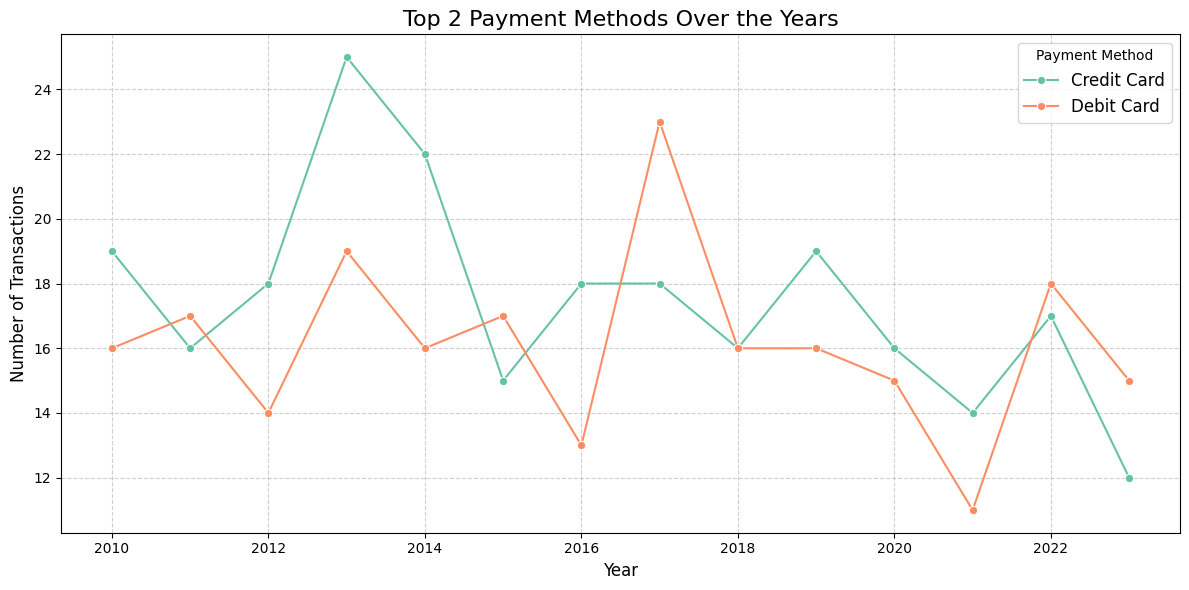

In [17]:
# 'year' => 'date'
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

# top 2 payment methods
top_2_methods = (
    df['payment method']
    .value_counts()
    .nlargest(2)
    .index
)


filtered_data = df[df['payment method'].isin(top_2_methods)]

# grouped data
payment_usage = (
    filtered_data.groupby(['year', 'payment method'])
    .size()
    .reset_index(name='count')
)

# Seaborn linechart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=payment_usage,
    x='year',
    y='count',
    hue='payment method',
    marker='o',
    palette='Set2'
)

# design
plt.title('Top 2 Payment Methods Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Payment Method', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


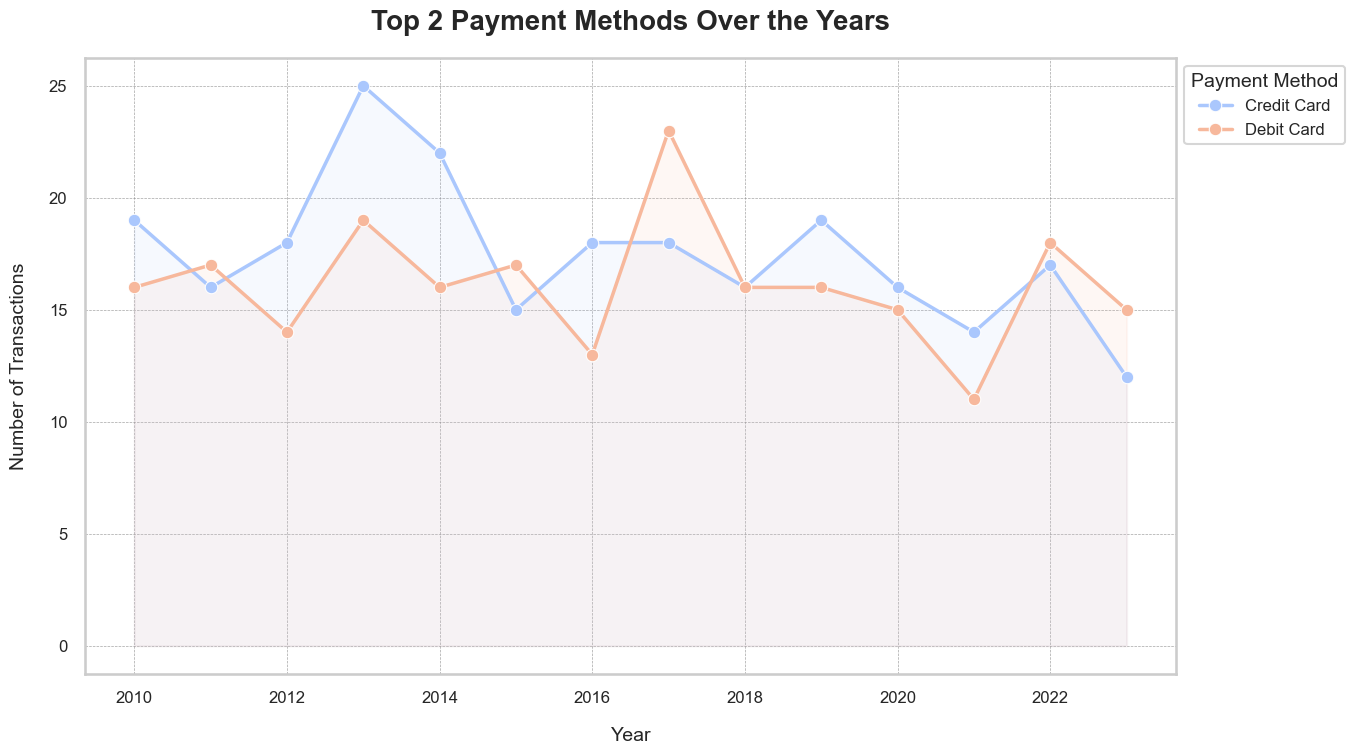

In [18]:

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

#
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=payment_usage,
    x='year',
    y='count',
    hue='payment method',
    marker='o',
    palette='coolwarm',
    linewidth=2.5,
)

# titles
plt.title('Top 2 Payment Methods Over the Years', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Number of Transactions', fontsize=14, labelpad=15)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(
    title='Payment Method',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)


plt.grid(which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# added highlight
for line, name in zip(plt.gca().lines, payment_usage['payment method'].unique()):
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.fill_between(x_data, y_data, color=line.get_color(), alpha=0.1)


plt.tight_layout()


plt.show()


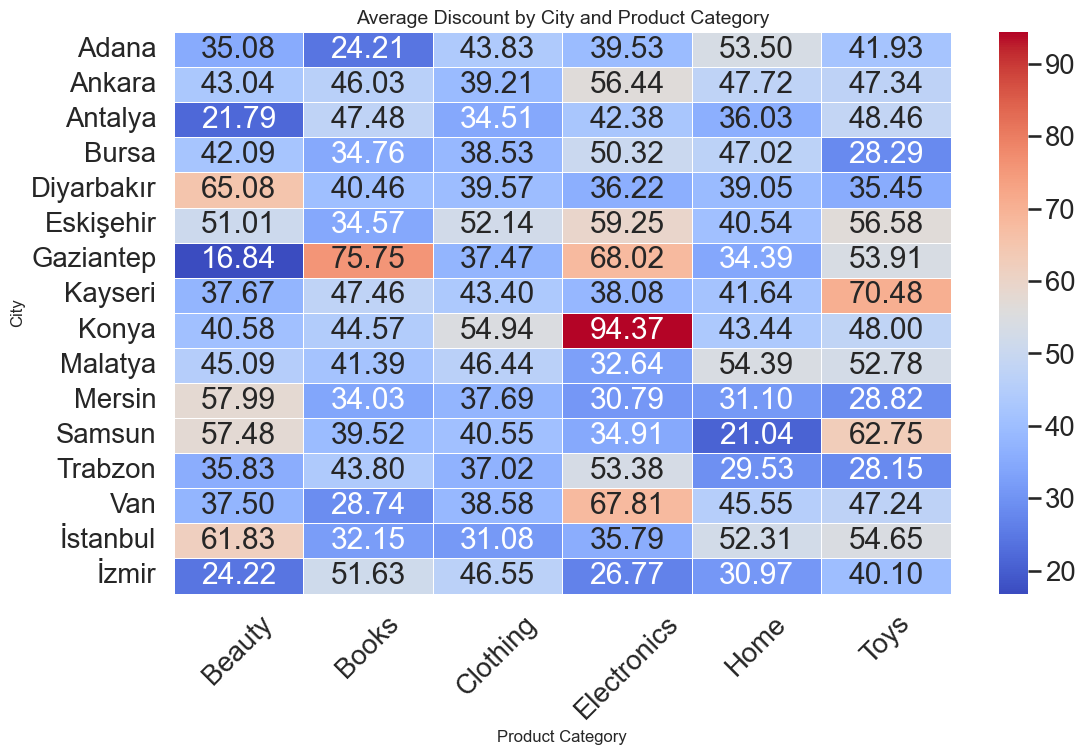

In [19]:
# What is the relationship between client location (city) and the average discount offered, and how does it change by product category?
city_category_discount = df.groupby(['city', 'category'])['discount'].mean().unstack()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(city_category_discount, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# title
plt.title('Average Discount by City and Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

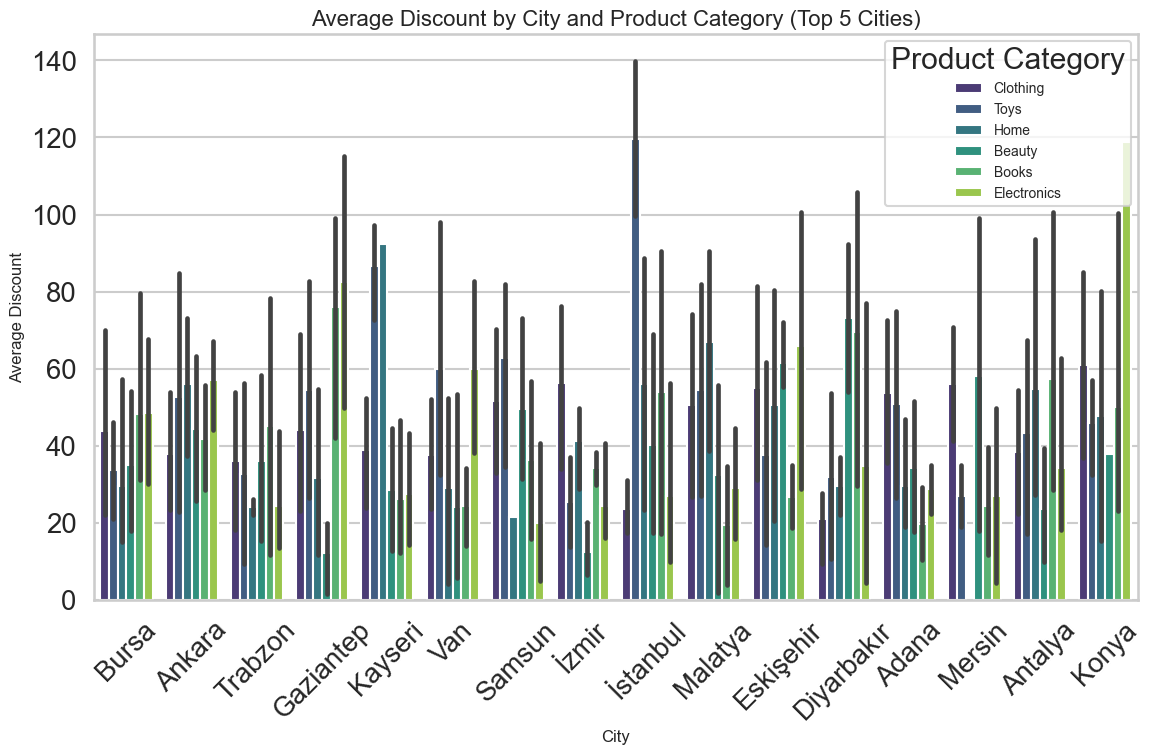

In [20]:
# Filtrelenmiş veriyi bar grafikte göster
plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered_data,
    x='city',
    y='discount',
    hue='category',
    palette='viridis'
)

plt.title('Average Discount by City and Product Category (Top 5 Cities)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Discount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Category', fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\m1502\AppData\Local\Temp\ipykernel_9788\176172449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\m1502\AppData\Local\Temp\ipykernel_9788\176172449.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


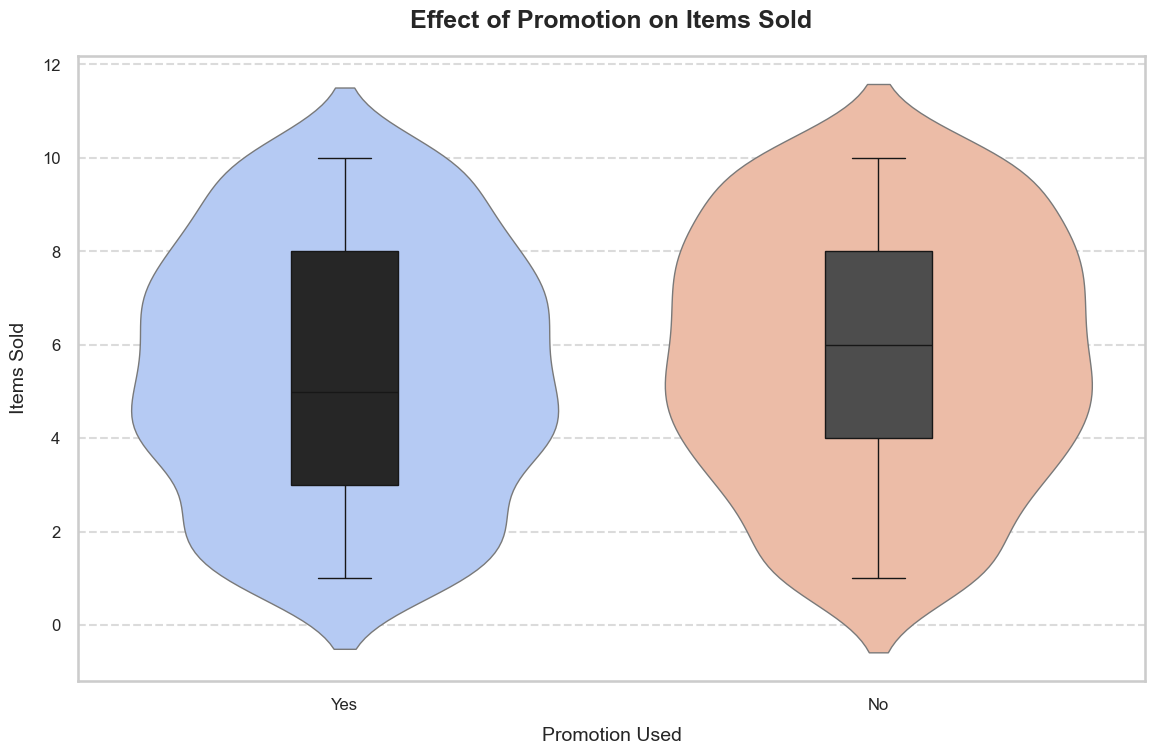

In [21]:
plt.figure(figsize=(12, 8))

# Violinplot
sns.violinplot(
    x='promotion used',
    y='items sold',
    data=df,
    palette='coolwarm',
    inner=None,  # İç dolguyu kapatır
    linewidth=1
)

#  boxplot
sns.boxplot(
    x='promotion used',
    y='items sold',
    data=df,
    width=0.2,  # length of box
    palette='dark:.3',
    showfliers=False  # do not show outliers
)

# titles
plt.title('Effect of Promotion on Items Sold', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Promotion Used', fontsize=14, labelpad=10)
plt.ylabel('Items Sold', fontsize=14, labelpad=10)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# design
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


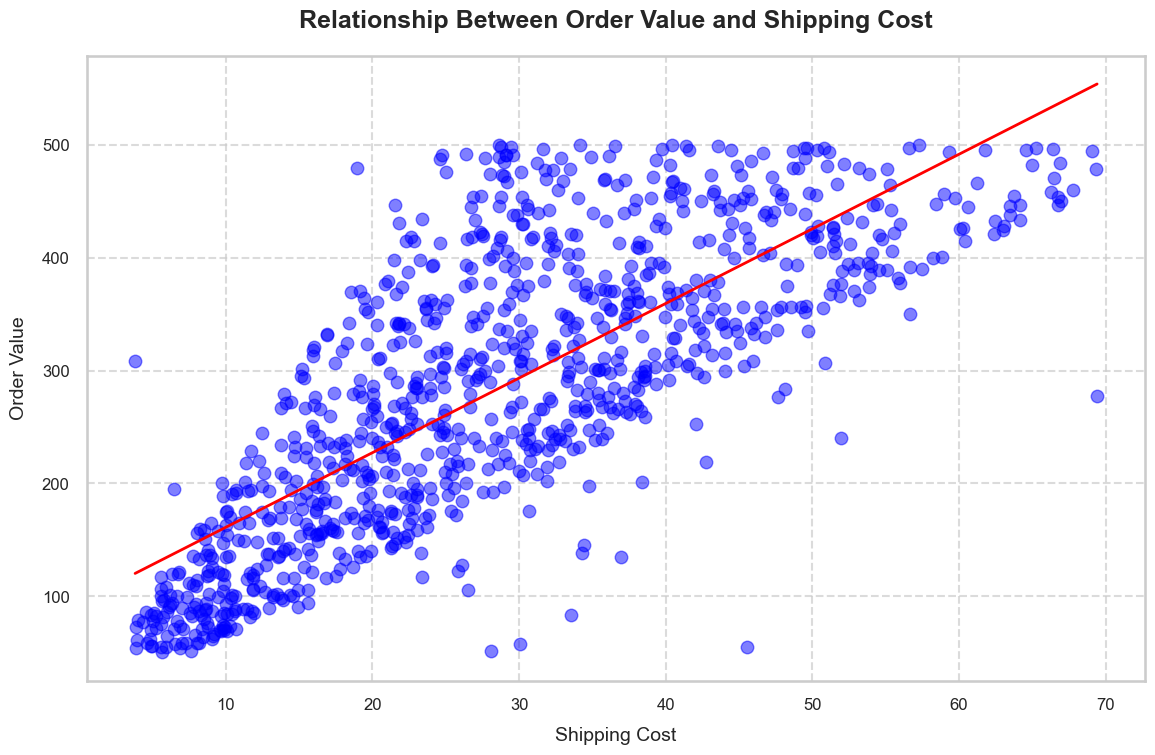

In [22]:
plt.figure(figsize=(12, 8))

# Regplot
sns.regplot(
    data=df,
    x='shipping cost',
    y='order value',
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'red', 'lw': 2},  # Regression line design
    ci=None
)

# titles
plt.title('Relationship Between Order Value and Shipping Cost', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Shipping Cost', fontsize=14, labelpad=10)
plt.ylabel('Order Value', fontsize=14, labelpad=10)

# Grid
plt.grid(axis='both', linestyle='--', alpha=0.7)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()


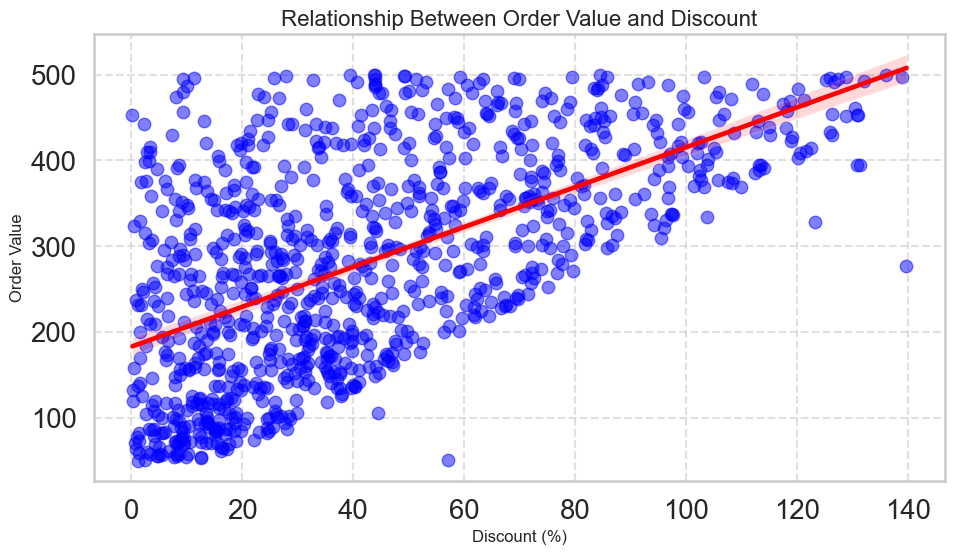

In [23]:
# relationships between discount and ordervalue ?
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='discount',
    y='order value',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    color='blue'
)

# Başlık ve eksen etiketleri
plt.title('Relationship Between Order Value and Discount', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Order Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

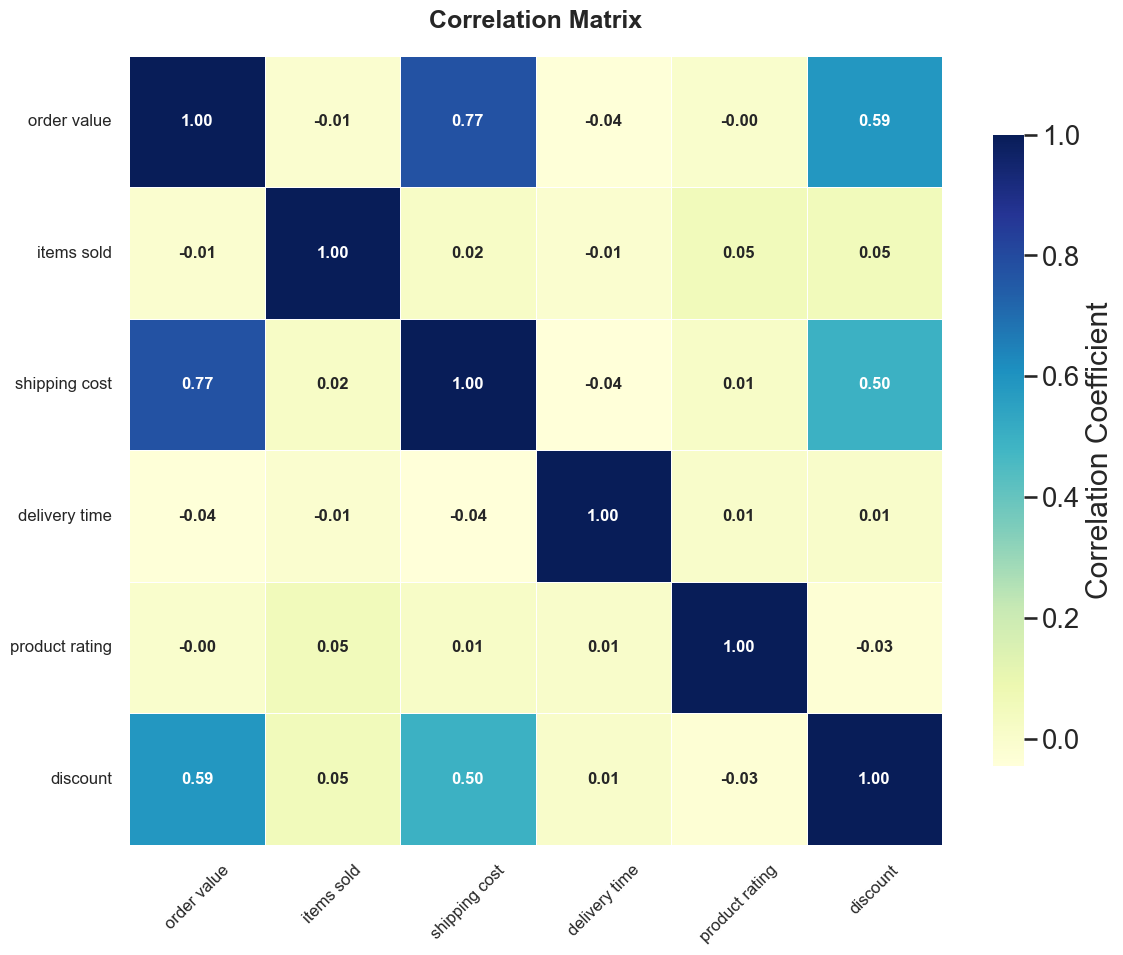

In [24]:
# correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.7,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    annot_kws={'size': 12, 'weight': 'bold'}
)

# titles
plt.title('Correlation Matrix', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)


plt.tight_layout()
plt.show()


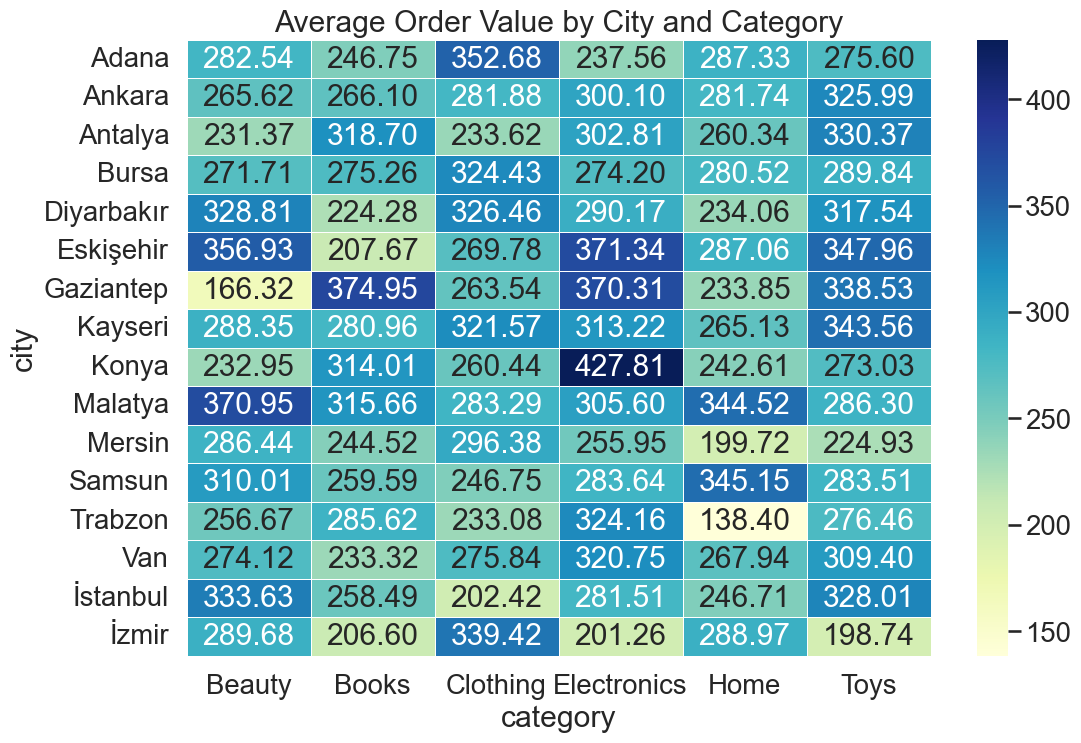

In [25]:
# Pivot table: Şehir ve kategoriye göre ortalama sipariş değeri
pivot_table = df.pivot_table(
    index='city',
    columns='category',
    values='order value',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Order Value by City and Category')
plt.show()

c:\Users\m1502\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m1502\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m1502\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m1502\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m1502\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

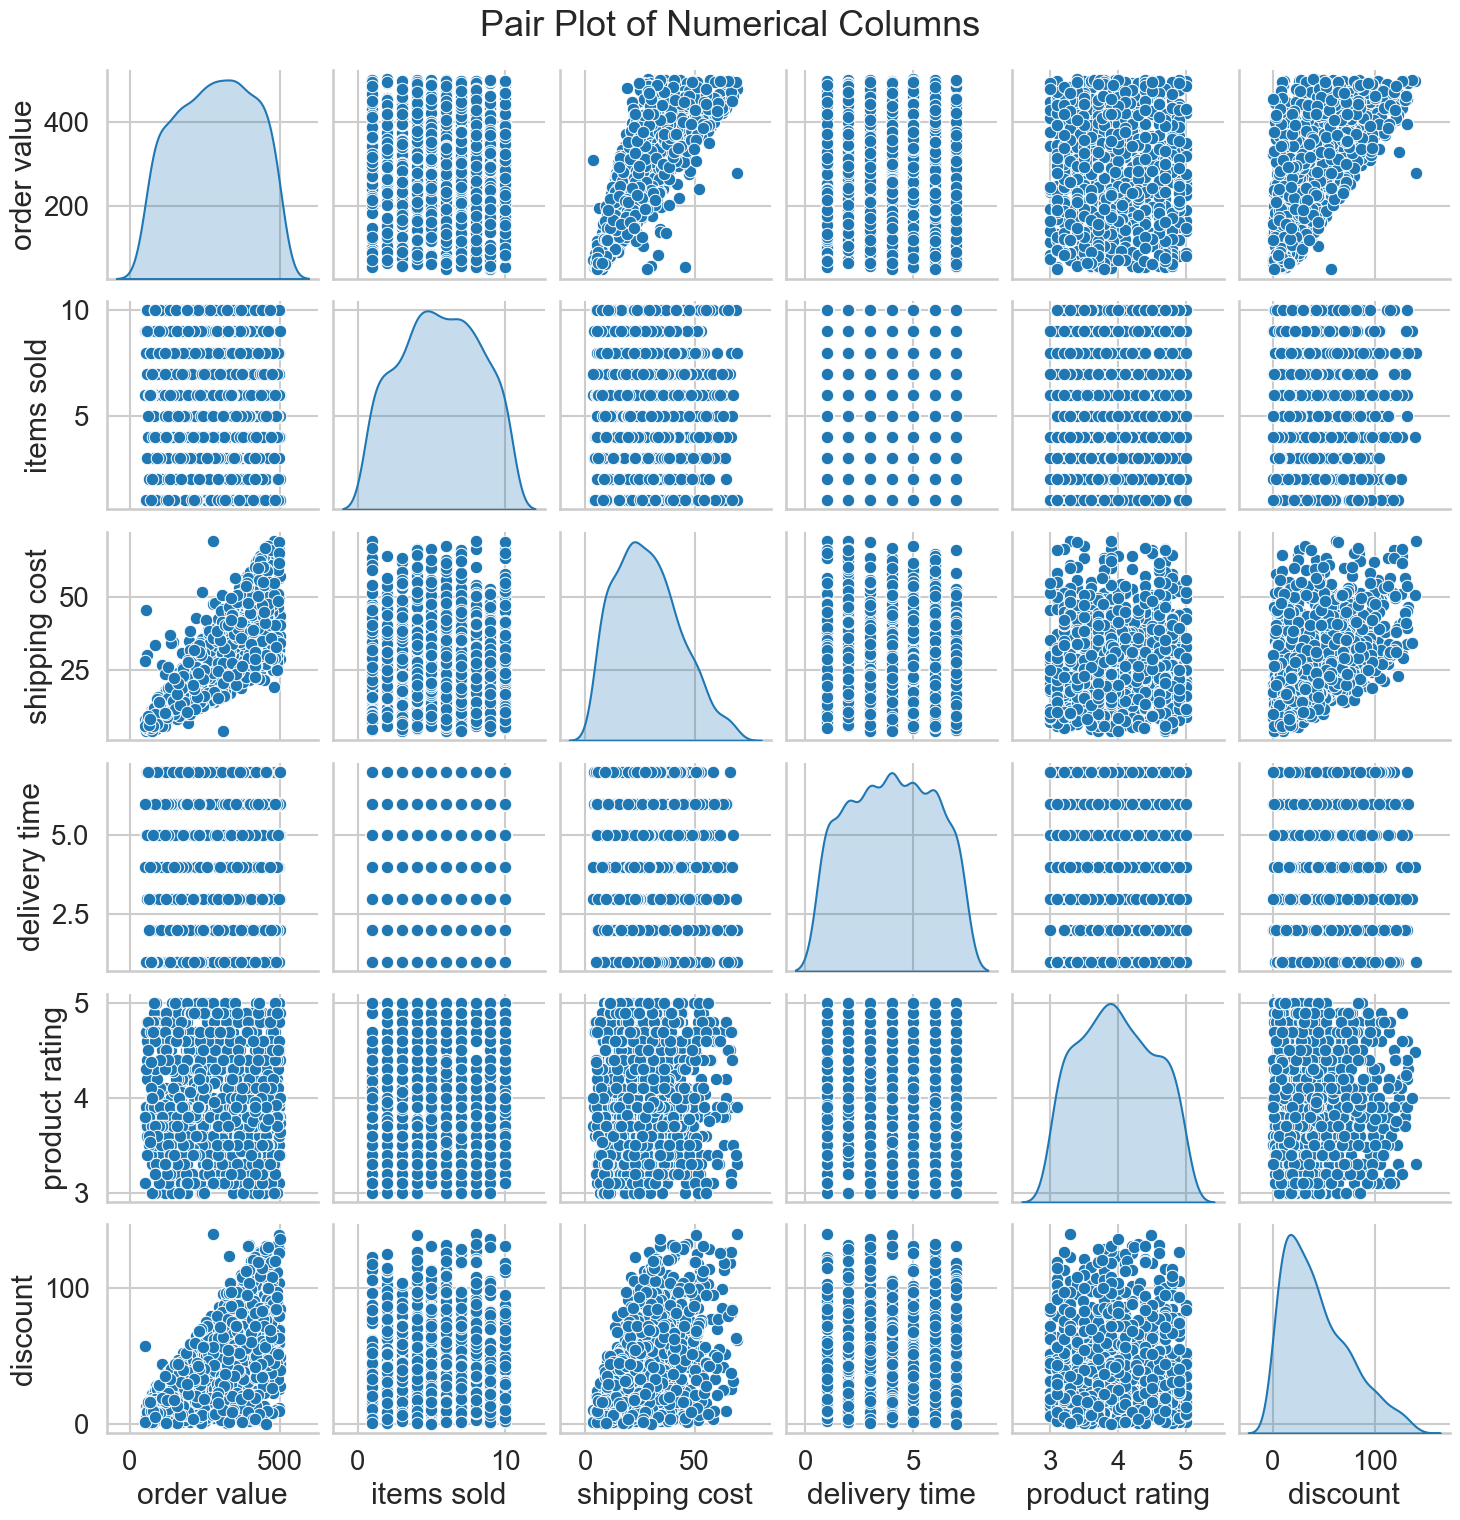

In [26]:
# pairplot for numerical columns
sns.pairplot(numerical_cols, diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

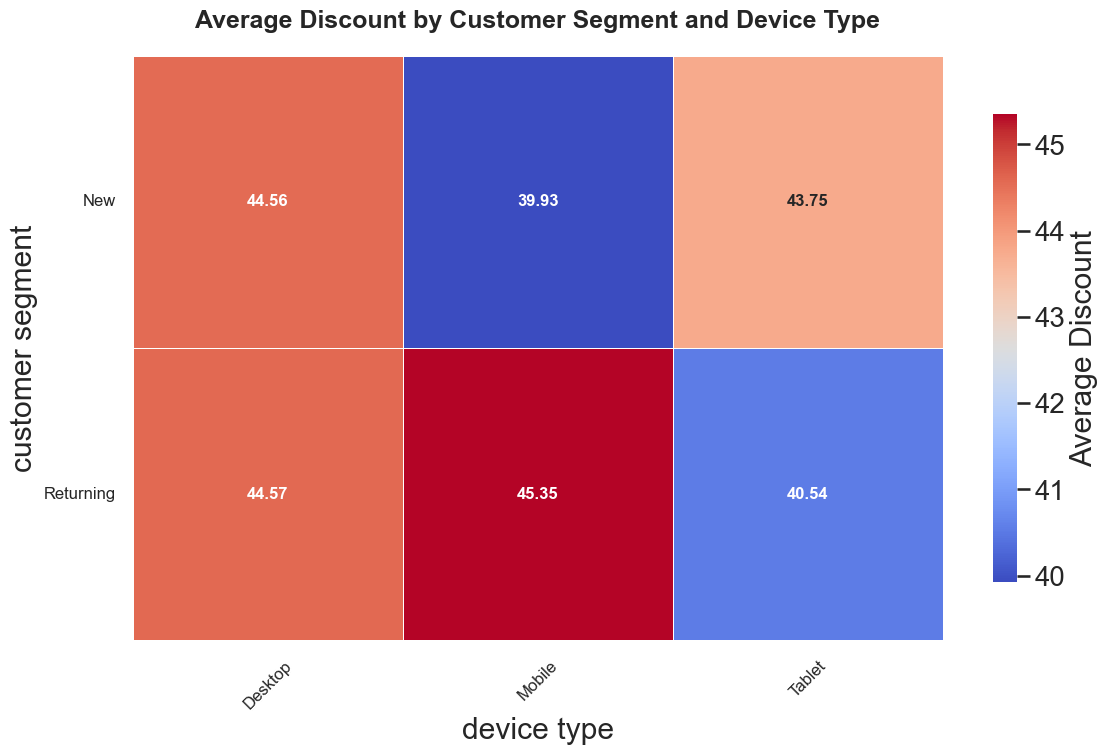

In [27]:
# Pivot table
pivot_table = df.pivot_table(
    index='customer segment',
    columns='device type',
    values='discount',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # Daha belirgin bir renk paleti
    linewidths=0.7,  # İnce çizgiler
    linecolor='white',  # Çizgiler beyaz
    cbar_kws={'shrink': 0.8, 'label': 'Average Discount'},  # Renk çubuğu
    annot_kws={'size': 12, 'weight': 'bold'}  # Sayı etiketleri için tasarım
)

# titles
plt.title('Average Discount by Customer Segment and Device Type', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)


plt.tight_layout()
plt.show()


C:\Users\m1502\AppData\Local\Temp\ipykernel_9788\346045150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\m1502\AppData\Local\Temp\ipykernel_9788\346045150.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


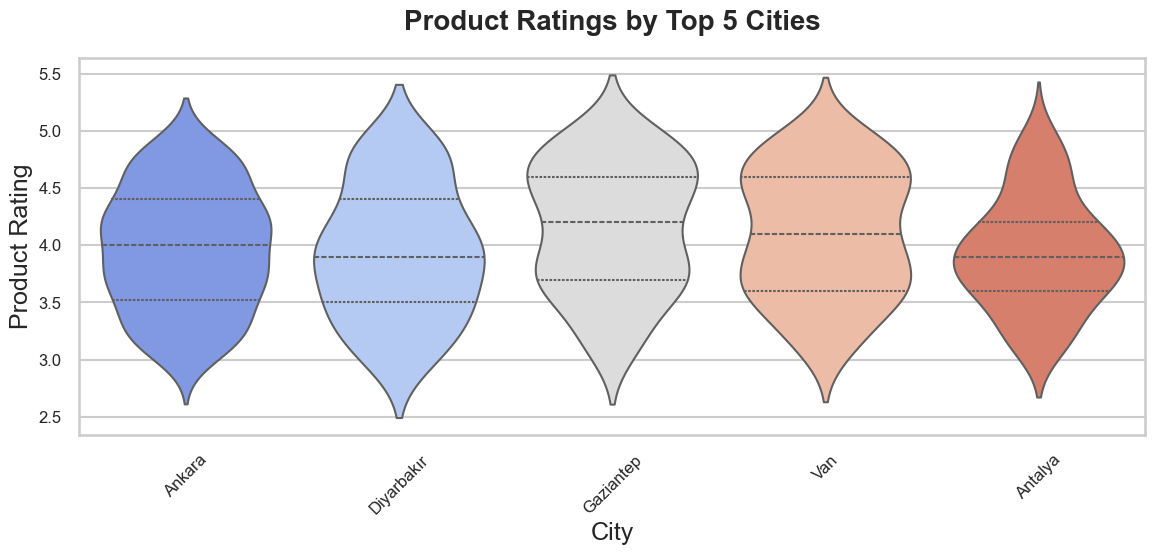

In [28]:
# Top 5 city with order value
top_5_cities = df['city'].value_counts().nlargest(5).index

# filtered data
filtered_data = df[df['city'].isin(top_5_cities)]

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=filtered_data,
    x='city',
    y='product rating',
    palette='coolwarm',
    scale='width',
    inner="quart",
    linewidth=1.5
)

# titles
plt.title('Product Ratings by Top 5 Cities', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=18)
plt.ylabel('Product Rating', fontsize=18)


plt.tick_params(axis='both', labelsize=12)

# X axis rotation
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


C:\Users\m1502\AppData\Local\Temp\ipykernel_9788\1213696502.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='discount', shade=True, color='purple')


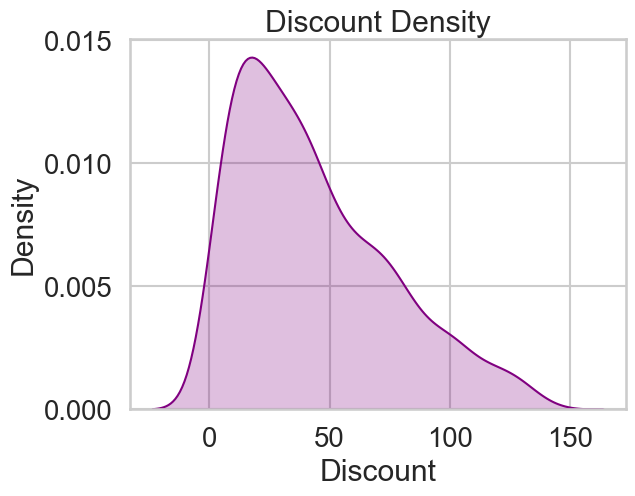

In [29]:
# density of discount
sns.kdeplot(data=df, x='discount', shade=True, color='purple')
plt.title('Discount Density')
plt.xlabel('Discount')
plt.ylabel('Density')
plt.show()

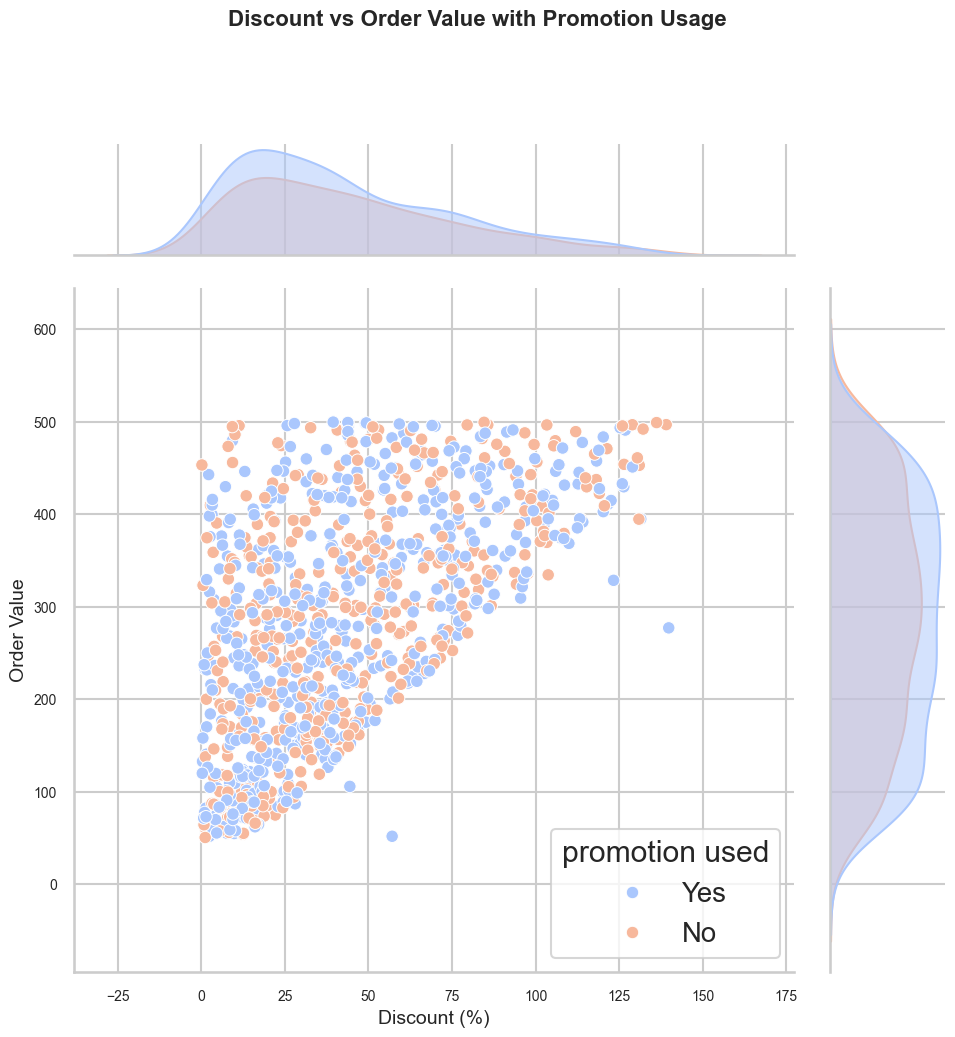

In [30]:
# Discount and Order Value relationships with promotion usage
g = sns.jointplot(
    data=df,
    x='discount',
    y='order value',
    kind='scatter',
    hue='promotion used',
    palette='coolwarm',
    height=10,
    marginal_kws={'color':'gray', 'alpha':0.5}  # Kenar grafiklerini daha şeffaf hale getirdik
)

# title
g.fig.suptitle('Discount vs Order Value with Promotion Usage', fontsize=16, fontweight='bold', y=1.05)

g.ax_joint.tick_params(axis='both', labelsize=10)

g.set_axis_labels('Discount (%)', 'Order Value', fontsize=14)


g.fig.tight_layout()
plt.show()


In [31]:
! pip install squarify